In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib auto

Using matplotlib backend: MacOSX


# Create Input Space and Starting Parameters

In [2]:
start_time=300                         #starting point in ms 
#start_current=9                       #input current in amperes 
time_step=0.005                          #time increments  


y=np.arange(0,1000.1,time_step)         

                                        #function that injects current at certain time
def start(start_time,start_current):
    x=np.zeros((len(y)))                #create empty array to plot current

    for i in range (0,len(y)):     
        if y[i] >start_time:            #when we reach start time, start plotting input current 
            x[i]=start_current          #each second afterwards will hold the constant value of the input current 
    return x

#  Calculate Differential Equations 

In [3]:
#these equations are not linear so they need to be approximated using Euler approximation
#we rewrite the derivatives to show the change in voltage over change in time between two different timesteps 
def equations(current,u,v,a,b): 
    v = v+time_step*(0.04*v**2+5*v+140-u+current)
    u = u+time_step*(a*(b*v-u))
    
    return u,v 

# Create the Izhikevich Model 

In [4]:
def model(a,b,c,d): 
    v = -65*np.ones((len(y)))         #creates the baseline array that holds the resting membrane potential 
    u = np.zeros((len(y)))            #initialize values for membrane recovery rate 
    u[0] = b*-65                      #initial value for u 
    
    current = start(start_time,start_current)
    for i in range(0,len(y)-1):
        u[i+1],v[i+1]  = equations(current[i],u[i],v[i],a,b)
                                    #after the spike reaches apex of 30mV, membrane voltage and recovery are reset
        if v[i+1] > 30:      
            v[i+1] = c 
            u[i+1] = u[i+1]+d
           
    plotting(current,v,a,b,c,d,y)
    #return spike 

# Plotting Current as a Function of Time and Membrane Potential 

In [5]:
def plotting(current,v,a,b,c,d,y):
    #PLOT OUTPUT CURRENT 
    #print('spike',spike)
    fig, ax1 = plt.subplots(figsize=(12,7))
    ax1.plot(y, v, label = 'Output')
    ax1.set_xlabel('Time in ms')
    ax1.set_ylabel('Output in mV', color='k')
    ax1.tick_params('y', colors='k')
    ax1.set_ylim(-95,40)
    ax1.set_title('Input Current: %s A ' %(start_current))
    plt.show()
 

# Result

In [6]:
#start_current=3
#model(0.02,0.2,-65,8)

# Train Weights

In [7]:
#USING PERCEPTRON RULE 
def training(iterations,alpha,data,answers):
    #initialize all weights to 0 
    w1=np.zeros(1)
    w2=np.zeros(1)
    #initialize bias to 0 
    b = np.zeros(1)
    
    
    for j in range(iterations):
        for i in range(len(data)):
            #I and W correspond to first input and second input, respectively 
            I,W = data[i]  
            #perceptron equation 
            eq = w1*I + w2*W + b
            if eq > 0: 
                result = 1
            else:
                result = 0
            #update weights and bias
            w1 += alpha*(answers[i]-result)*data[i][0]
            w2 += alpha*(answers[i]-result)*data[i][1]
            b += alpha*(answers[i]-result)
            #print(w1,w1)
    return w1,w2,b


    
  

# Encode, Get Final Weights, Decode

0


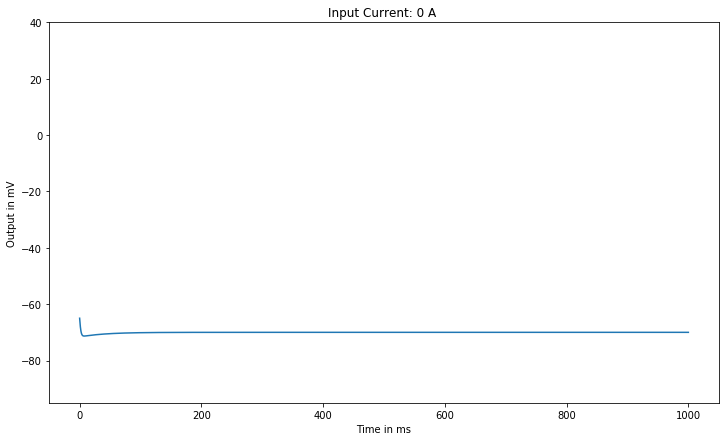

1


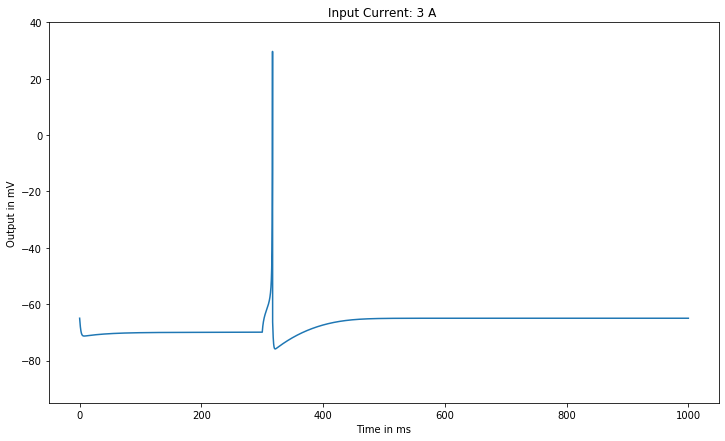

0


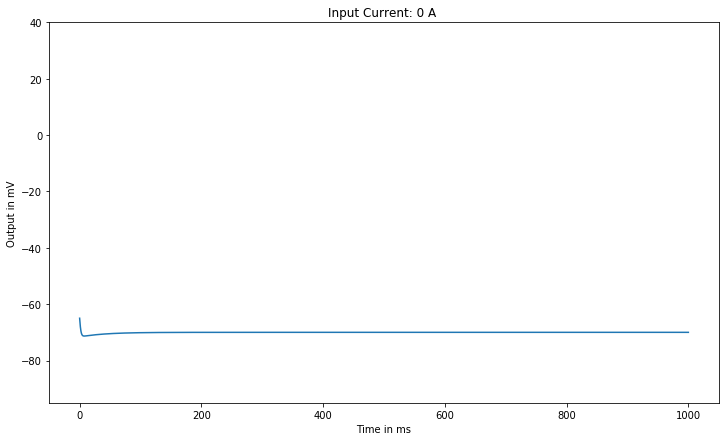

0


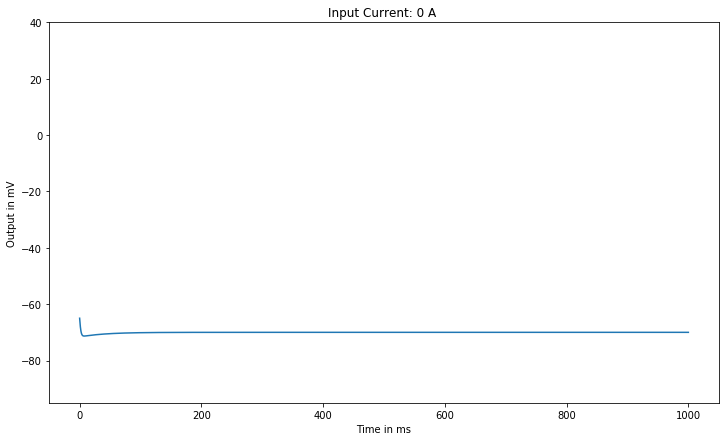

In [8]:
alpha=0.1
#input data 
data = np.array([[0,0],[1,1],[1,0],[0,1]])
#change answers to correspond to gate. Currently set to AND gate 
answers = np.array([0,1,0,0])

#get finalized weights    
w1,w2,b = training(10,alpha,data,answers)
#print(w1,w2)

neuron1 = data[:,0]
neuron2 = data[:,1]

results = []

for i in range(len(data)): 
    I,W = data[i]
    #input finalized weights into perceptron rule 
    eq = w1*I + w2*W + b
    if eq > 0: 
        result = 1
    else:
        result = 0
    #3A is minimum current to produce one spike 
    #decode 0,1 to represent spike 
   
    results.append(result)
    
    start_current=3*result
    print(result)
    #plot 
    model(0.02,0.2,-65,8)


results = np.asarray(results)

In [9]:
# import matplotlib

# data1 = np.random.random([6, 50])

# # set different colors for each set of positions
# colors1 = ['C{}'.format(i) for i in range(4)]

# # set different line properties for each set of positions
# # note that some overlap


# fig, axs = plt.subplots(2, 2)

# # create a horizontal plot
# print(model)

print(neuron1, neuron2, results)

total = []

total.append(neuron1)
total.append(neuron2)
total.append(results)

total = np.asarray(total)

print(np.array([total[:,0]]))

first = np.array_split(total[:,0], 3)
second = np.array_split(total[:,1], 3)
third = np.array_split(total[:,2], 3)
fourth = np.array_split(total[:,3], 3)

print(first, second, third, fourth)

[0 1 1 0] [0 1 0 1] [0 1 0 0]
[[0 0 0]]
[array([0]), array([0]), array([0])] [array([1]), array([1]), array([1])] [array([1]), array([0]), array([0])] [array([0]), array([1]), array([0])]


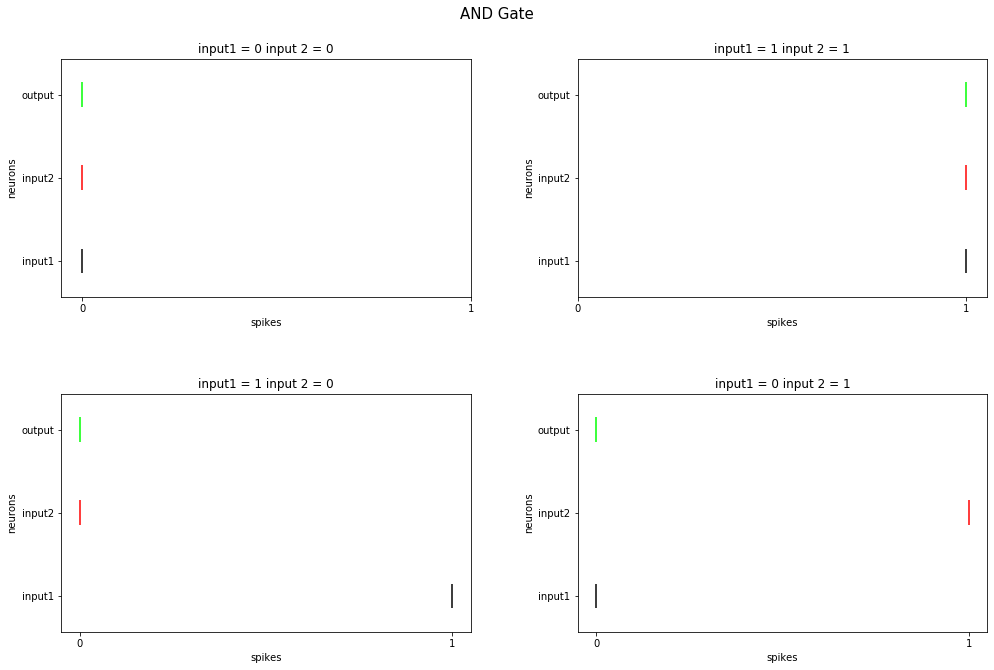

In [49]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(2, 2, figsize = ((15,10)))

# Set different colors for each neuron
colorCodes = np.array([[0, 0, 0], [1, 0, 0], [0, 1, 0]])
                       
# Set spike colors for each neuron
lineSize = [0.3, 0.3, 0.3]                                  

# Draw a spike raster plot
axs[0,0].eventplot(first, color=colorCodes, linelengths = lineSize) 
axs[0,0].set(xlabel = 'spikes', ylabel = 'neurons')
plt.sca(axs[0, 0])
axs[0,0].set_title("input1 = 0 input 2 = 0")
plt.yticks(range(3), ['input1', 'input2', 'output'], color='black')
plt.xticks(range(2), ['0','1'])

axs[0,1].eventplot(second, color=colorCodes, linelengths = lineSize) 
axs[0,1].set(xlabel = 'spikes', ylabel = 'neurons')
plt.sca(axs[0, 1])
axs[0,1].set_title("input1 = 1 input 2 = 1")
plt.yticks(range(3), ['input1', 'input2', 'output'], color='black')
plt.xticks(range(2), ['0','1'])

axs[1,0].eventplot(third, color=colorCodes, linelengths = lineSize) 
axs[1,0].set(xlabel = 'spikes', ylabel = 'neurons')
plt.sca(axs[1, 0])
axs[1,0].set_title("input1 = 1 input 2 = 0")
plt.yticks(range(3), ['input1', 'input2', 'output'], color='black')
plt.xticks(range(2), ['0','1'])

axs[1,1].eventplot(fourth, color=colorCodes, linelengths = lineSize) 
axs[1,1].set(xlabel = 'spikes', ylabel = 'neurons')
plt.sca(axs[1, 1])
axs[1,1].set_title("input1 = 0 input 2 = 1")
plt.yticks(range(3), ['input1', 'input2', 'output'], color='black')
plt.xticks(range(2), ['0','1'])


plt.suptitle('AND Gate',fontsize = 15)
# Display the spike raster plot

fig.tight_layout(pad=5.0)

plt.show()